In [1]:
# Importing Libraries
import pandas as pd
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else None
)


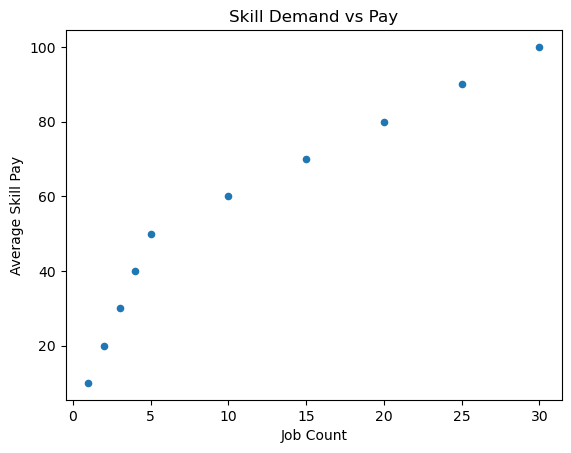

In [8]:
data = {
    'job_skills': ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'job_count': [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_pay': [100, 90, 80, 70, 60, 50, 40, 30, 20, 10],
    }

df = pd.DataFrame(data)
df.plot(kind='scatter', x= 'job_count', y= 'skill_pay', title='Skill Demand vs Pay')
plt.xlabel('Job Count')
plt.ylabel('Average Skill Pay')
plt.show()

In [11]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()



In [12]:
df_da = df[df['job_title_short'] == 'Data Analyst']


In [17]:
df_exploded = df.explode('job_skills')

df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count')
)



,skill_count
job_skills,
"['airflow', 'confluence']",1
"['airflow', 'datarobot', 'docker', 'kubernetes']",1
"['airflow', 'docker', 'gitlab', 'kubernetes']",1
"['airflow', 'docker', 'kubernetes', 'terraform', 'gitlab']",1
"['airflow', 'docker', 'kubernetes']",1
...,...
['xamarin'],1
['yarn'],3
"['zoom', 'microsoft teams', 'webex']",1


In [18]:
df_exploded = df.explode('job_skills')

skill_counts = (
    df_exploded
    .groupby('job_skills')
    .agg(skill_count=('job_skills', 'count'))
    .reset_index()
)


In [23]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary= ('salary_year_avg', 'median')
)

skills_stats = skill_stats.sort_values(by='skill_count', ascending=False). head(10)

0 ['excel']
1 ['sql']
2 ['python']
3 ['python', 'sql']
4 ['sql', 'excel']
5 ['sql', 'python']
6 ['sap']
7 ['go']
8 ['python', 'r']
9 ['flow']


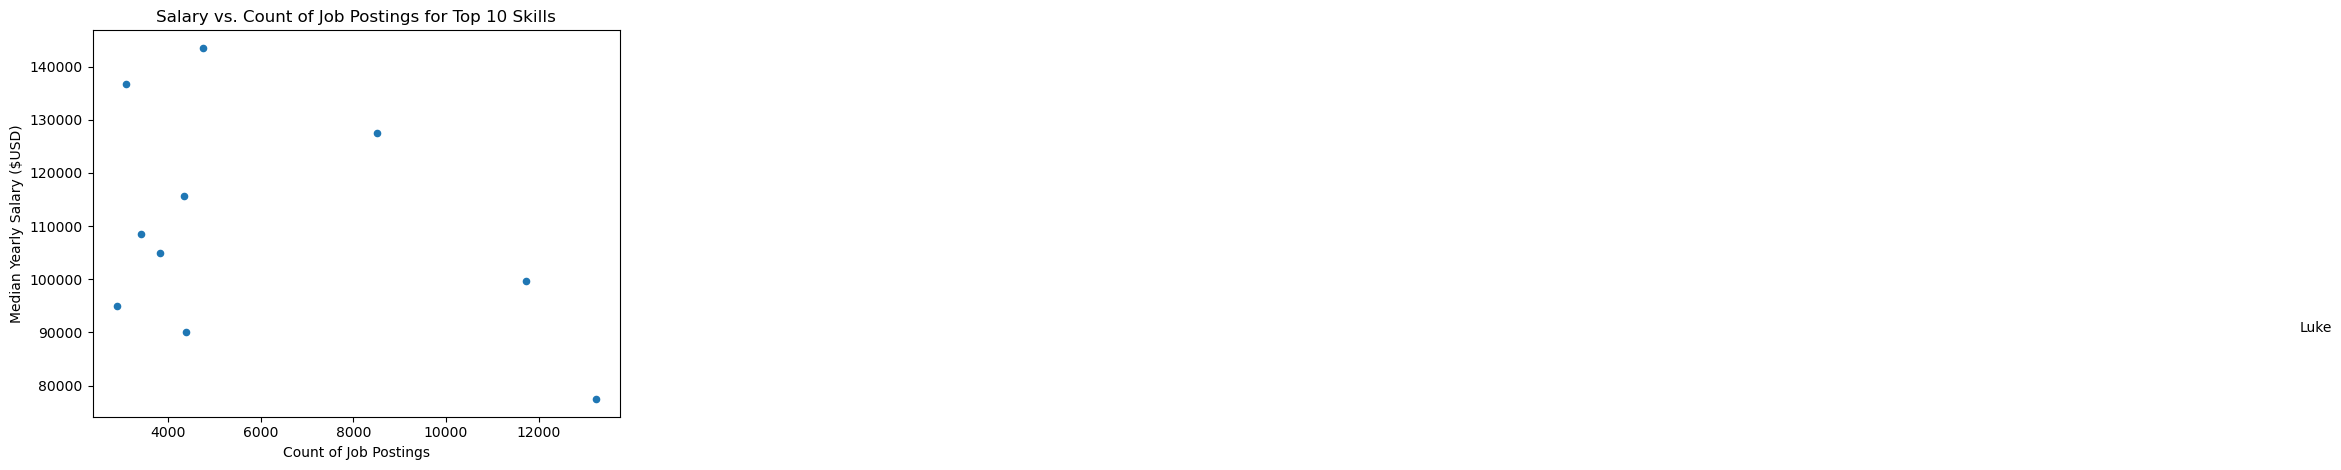

In [ ]:
skills_stats.plot(kind='scatter', x='skill_count', y= 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    print(i, txt)
plt.text(50000, 90000, "Luke")

plt.show()

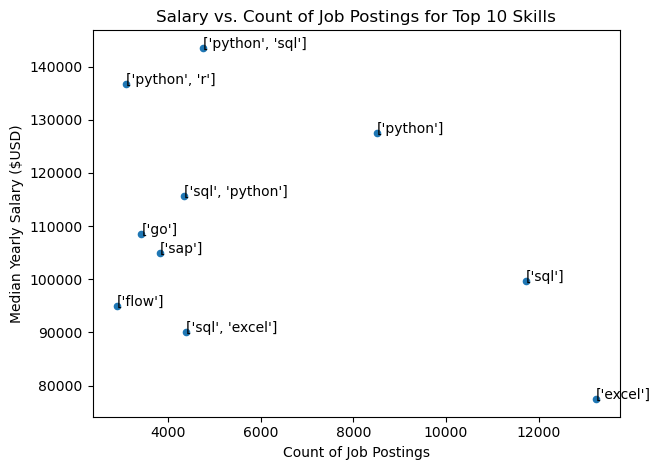

In [29]:
skills_stats.plot(kind='scatter', x='skill_count', y= 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skill_count'].iloc[i], skills_stats['median_salary'].iloc[i], txt)

plt.show()

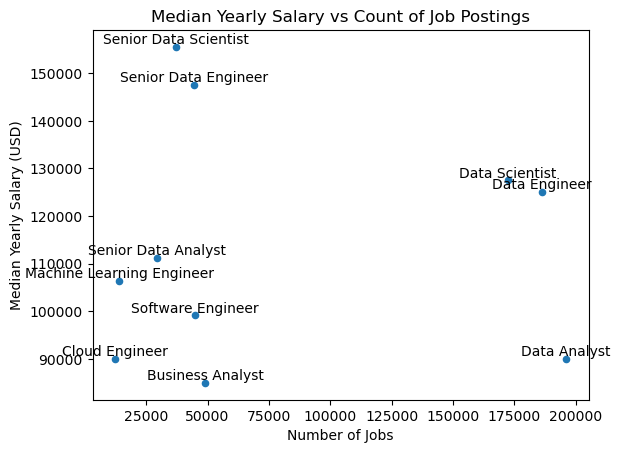

In [30]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Group data by job title and calculate average yearly salary and job count
job_title_stats = df.groupby('job_title_short').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_title_short', 'count')
).dropna()

# Plotting the results
job_title_stats.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Median Yearly Salary vs Count of Job Postings')

# Adding job title labels to each point
for i in range(len(job_title_stats)):
   job_count = job_title_stats['job_count'].iloc[i]
   mean_salary = job_title_stats['median_salary_year_avg'].iloc[i]
   job_title = job_title_stats.index[i]
   plt.text(job_count, mean_salary, job_title, ha='center', va='bottom')

plt.show()

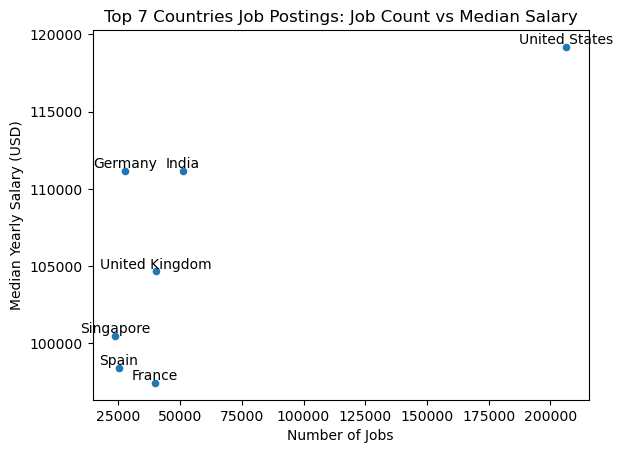

In [31]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Group data by country and calculate median hourly salary and job count
country_stats = df.groupby('job_country').agg(
   median_salary_year_avg=('salary_year_avg', 'median'),
   job_count=('job_country', 'count')
).dropna()

# Sort by job count in descending order and take the top 7
top_countries = country_stats.sort_values(by='job_count', ascending=False).head(7)

# Plotting the results
top_countries.plot(kind='scatter', x='job_count', y='median_salary_year_avg')
plt.xlabel('Number of Jobs')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Top 7 Countries Job Postings: Job Count vs Median Salary')

# Adding country labels to each point
for i in range(len(top_countries)):
   job_count = top_countries['job_count'].iloc[i]
   mean_salary = top_countries['median_salary_year_avg'].iloc[i]
   country = top_countries.index[i]
   plt.text(job_count, mean_salary, country, ha='center', va='bottom')

plt.show()

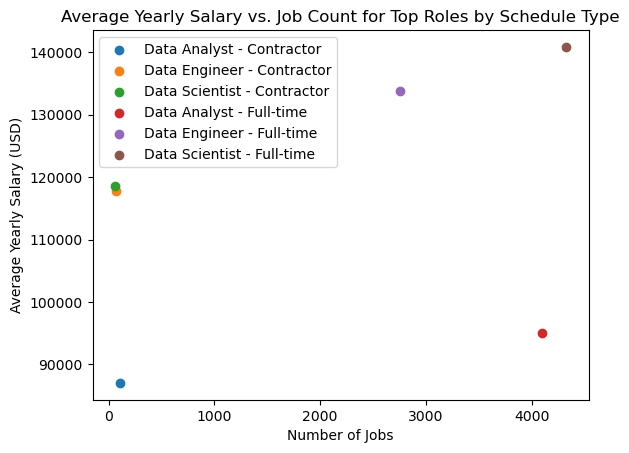

In [33]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Define specific job titles to include
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

# Filter US jobs for only full-time and part-time roles and specific job titles, then drop rows with missing salary data
us_jobs_df = df[
   (df['job_country'] == 'United States') &
   (df['job_schedule_type'].isin(['Full-time', 'Contractor'])) &
   (df['job_title_short'].isin(target_job_titles))
].dropna(subset=['salary_year_avg']).copy()

# Group by job schedule type and job title, calculate mean yearly salary and job count
stats = us_jobs_df.groupby(['job_schedule_type', 'job_title_short']).agg(
   mean_salary_year_avg=('salary_year_avg', 'mean'),
   job_count=('job_title_short', 'count')
).dropna()

# Reset the index to make plotting easier
stats.reset_index(inplace=True)

# Combine title and type into one value for labels
stats['job_title_type'] = stats['job_title_short'] + ' - ' + stats['job_schedule_type']

# Plot using plt.scatter()
for job_title_type in stats['job_title_type'].unique():
   subset = stats[stats['job_title_type'] == job_title_type]
   plt.scatter(subset['job_count'], subset['mean_salary_year_avg'], label=job_title_type)

plt.xlabel('Number of Jobs')
plt.ylabel('Average Yearly Salary (USD)')
plt.title('Average Yearly Salary vs. Job Count for Top Roles by Schedule Type')
plt.legend()
plt.show()